In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/mahesh147/Multiple-Linear-Regression/master/50_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
df['State']=le.fit_transform(df['State'])

In [7]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [8]:
x = df.drop(['Profit'],axis=1).values

df.iloc([:,:-1])

In [9]:
x

array([[1.6534920e+05, 1.3689780e+05, 4.7178410e+05, 2.0000000e+00],
       [1.6259770e+05, 1.5137759e+05, 4.4389853e+05, 0.0000000e+00],
       [1.5344151e+05, 1.0114555e+05, 4.0793454e+05, 1.0000000e+00],
       [1.4437241e+05, 1.1867185e+05, 3.8319962e+05, 2.0000000e+00],
       [1.4210734e+05, 9.1391770e+04, 3.6616842e+05, 1.0000000e+00],
       [1.3187690e+05, 9.9814710e+04, 3.6286136e+05, 2.0000000e+00],
       [1.3461546e+05, 1.4719887e+05, 1.2771682e+05, 0.0000000e+00],
       [1.3029813e+05, 1.4553006e+05, 3.2387668e+05, 1.0000000e+00],
       [1.2054252e+05, 1.4871895e+05, 3.1161329e+05, 2.0000000e+00],
       [1.2333488e+05, 1.0867917e+05, 3.0498162e+05, 0.0000000e+00],
       [1.0191308e+05, 1.1059411e+05, 2.2916095e+05, 1.0000000e+00],
       [1.0067196e+05, 9.1790610e+04, 2.4974455e+05, 0.0000000e+00],
       [9.3863750e+04, 1.2732038e+05, 2.4983944e+05, 1.0000000e+00],
       [9.1992390e+04, 1.3549507e+05, 2.5266493e+05, 0.0000000e+00],
       [1.1994324e+05, 1.5654742e+

In [10]:
y=df['Profit'].values

In [11]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/4,random_state=145)

In [13]:
(x_train.shape),(x_test.shape)

((37, 4), (13, 4))

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [16]:
model.predict(x_test)

array([152121.01879858,  85549.89916476, 113718.26930777, 162429.27568488,
        62760.42062519,  69969.89459794, 134047.33793242,  79838.35661033,
       116995.80962941, 104087.52729299,  43278.91835791, 129111.37709258,
       195129.37466086])

In [17]:
plt.figure(figsize=(7,5))


<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

In [18]:
x_test.shape,y_test.shape

((13, 4), (13,))

In [19]:
y_test

array([132602.65,  96479.51, 105008.31, 155752.6 ,  81229.06,  77798.83,
       144259.4 ,  81005.76, 126992.93, 103282.38,  64926.08, 141585.52,
       192261.83])

#### visualizing the data with respect to testing data and creating a best fit line

Text(0, 0.5, 'Actual values')

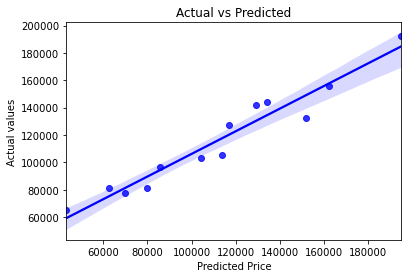

In [26]:
sns.regplot(x=model.predict(x_test),y=y_test,color='b')
plt.title('Actual vs Predicted')
plt.xlabel('Predicted Price')
plt.ylabel('Actual values')

Text(0, 0.5, 'Actual values')

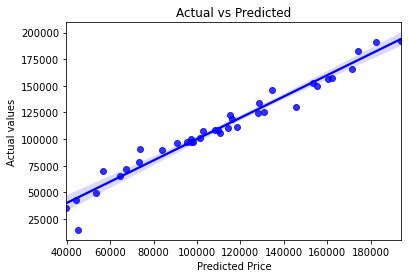

In [25]:
sns.regplot(x=model.predict(x_train),y=y_train,color='b')
plt.title('Actual vs Predicted')
plt.xlabel('Predicted Price')
plt.ylabel('Actual values')

In [27]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [23]:
r2_score(y_test,model.predict(x_test))

0.8865319933143321

In [24]:
r2_score(y_train,model.predict(x_train))

0.96089067905123

In [28]:
mean_absolute_error(y_test,model.predict(x_test))

10100.213210349884

In [29]:
mean_absolute_error(y_train,model.predict(x_train))

5807.548343583162

In [30]:
mean_squared_error(y_test,model.predict(x_test))

143224134.9097764

In [31]:
mean_squared_error(y_train,model.predict(x_train))

66555441.17976178